In [1]:
import pandas as pd
import os

In [2]:
import numpy as np

In [3]:
import time
from tqdm import tqdm

In [4]:
import tensorflow as tf
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [5]:
import pickle

In [68]:
import random

In [143]:
movie = pd.read_pickle('/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Undersampled Dataset.pkl')

In [130]:
movie = pd.read_csv("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/cleaned_movies.csv", encoding='utf-8')

In [140]:
# movie['sample'] = 0
# random.seed(1)
# for i in movie.columns[1:6]:
#     j = np.random.choice(movie.where(movie[i] == 1).index,size = 4000, replace = False)
#     movie['sample'][j] = 1    
# movie2 = movie.loc[movie['sample'] == 1]
# movie2 = movie2.drop(['sample'], axis = 1)
# movie2

drama = movie[movie['Drama/Documentary'] == 1].index
for i in drama:
    for j in movie.columns[1:6]:
        if movie[movie[str(j)][i] == 0]:
            k = str(j)
            k = movie[movie[str(j)] == 1].index
rando = np.random.choice(drama, 4000, replace = False)
sample = movie.loc[rando]

sample['Drama/Documentary'].sum()

KeyError: 'Drama/Documentary'

In [137]:
movie.head(5)

,Unnamed: 0,Title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,#1 Cheerleader Camp (2010),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,#Horror (2015),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,#Pellichoopulu (2016),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
movie.head(5)

,Title,Comedy,Crime,Horror,Romance,Thriller,Action/Adventure,Drama/Documentary
3,#Pellichoopulu (2016),1,0,0,1,0,0,1
4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0
6,$5 a Day (2008),1,0,0,0,0,0,1
8,$9.99 (2008),0,0,0,0,0,0,1
9,$ellebrity (2012),0,0,0,0,0,0,1


In [151]:
movie.loc[((movie['Drama/Documentary'] == 1) & (movie['Comedy'] == 0) & (movie['Crime'] == 0) 
           & (movie['Horror'] == 0) & (movie['Romance'] == 0) & (movie['Thriller'] == 0)
          & (movie['Action/Adventure'] == 0))].count()

Title                5876
Comedy               5876
Crime                5876
Horror               5876
Romance              5876
Thriller             5876
Action/Adventure     5876
Drama/Documentary    5876
dtype: int64

In [152]:
movie.loc[((movie['Drama/Documentary'] == 1) & (movie['Comedy'] == 0) & (movie['Crime'] == 0) 
           & (movie['Horror'] == 0) & (movie['Romance'] == 0) & (movie['Thriller'] == 0)
          & (movie['Action/Adventure'] == 0))].count()

Title                1581
Comedy               1581
Crime                1581
Horror               1581
Romance              1581
Thriller             1581
Action/Adventure     1581
Drama/Documentary    1581
dtype: int64

In [136]:
for i in movie.columns[2:10]:
    print(i)
    print(movie[str(i)].sum())
    



Action
4961
Adult
8
Adventure
3518
Animation
1510
Biography
1839
Comedy
11490
Crime
4854
Documentary
3343


In [60]:
titles = movie.Title.tolist()

In [13]:
x = []
x_titles = []
for name in tqdm((os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"))):
    sb = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"+name
    s = name[:-4]
    x_titles.append(s)
    if(s in titles):
        img = cv2.imread(sb)
        x.append(img)

100%|██████████| 37873/37873 [00:32<00:00, 1150.35it/s]


In [25]:
len(x)

36117

In [17]:
movie = movie.reset_index(drop = True)

In [18]:
movie.head(5)

,Title,Comedy,Crime,Horror,Romance,Thriller,Action/Adventure,Drama/Documentary
0,#Pellichoopulu (2016),1,0,0,1,0,0,1
1,"$1,000 on the Black (1966)",0,0,0,0,0,0,0
2,$5 a Day (2008),1,0,0,0,0,0,1
3,$9.99 (2008),0,0,0,0,0,0,1
4,$ellebrity (2012),0,0,0,0,0,0,1


In [19]:
df = movie.drop(movie.columns[0], axis=1)

In [27]:
df.head(5)

,Comedy,Crime,Horror,Romance,Thriller,Action/Adventure,Drama/Documentary
0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [55]:
df['Drama/Documentary'].sum()

13880

In [56]:
df['Comedy'].sum()

7525

In [57]:
df['Crime'].sum()

3176

In [58]:
len(df.Crime)

23549

In [28]:
y = df.values

In [29]:
x = np.stack(x)

In [30]:
print(x.shape)
print(y.shape)

(23549, 268, 182, 3)
(23549, 7)


In [31]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
input_shape = x_train[0].shape
num_class = y_train.shape[1]
print(input_shape)
print(num_class)

(268, 182, 3)
7


In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 5
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 6
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 7
model.add(Dense(num_class))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train,
          batch_size=128, epochs=1, verbose=1)

Epoch 1/1
16484/16484 [==============================] - 605s 37ms/step - loss: 1.5552 - acc: 0.7163


In [36]:
prediction = model.predict(x_test)

In [52]:
y_test[130]

array([0, 0, 1, 0, 1, 0, 0])

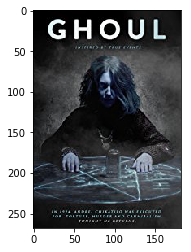

In [51]:
plt.imshow(x_test[130])

In [53]:
print(prediction[130])

[0.37866488 0.31166267 0.28289777 0.31926522 0.32993168 0.3140504
 0.5296059 ]


In [54]:
np.argmax(prediction[130])

6

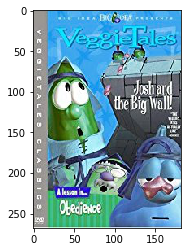

In [67]:
plt.imshow(x_test[789])

In [68]:
evaluate = model.evaluate(x_test,y_test)
print(evaluate)
print(model.metrics_names)

10836/10836 [==============================] - 155s 14ms/step
[0.21706690361751493, 0.9220554400476066]
['loss', 'acc']
